### Analyze Fast Food Menu and Meal Combination Data

Code to analyze the nutritional content of menu items and meal combinations at fast food chains.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import itertools as it

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import menu, meal, and goal data

In [2]:
# df_menu contains the nutritional information for every menu item at each restaurant.
df_menu = pd.read_csv(r'C:\Users\Jenny\fast_food\menu_nf.csv', index_col=0)

# df_goal_daily contains daily nutritional goals based on four scenarios: 1500, 2000, 2500, and 2500 calories per day.
# df_goal_meal contains the nutritional goals for this fast food meal, assuming it represents 40% of the daily goal's nutrition.
df_goal_daily = pd.read_csv(r'C:\Users\Jenny\fast_food\goal_daily.csv', index_col=0)
df_goal_meal = pd.read_csv(r'C:\Users\Jenny\fast_food\goal_meal.csv', index_col=0)

# df_meal_0 contains the meal combination options for scenario_0 (1500 calories per day).
# df_meal_1 assumes 2000 calories, df_meal_2 assumes 2500 calories, and df_meal_3 assumes 3000 calories.
# Each df_meal dataframe has three meal_types: entree_only, entree_side, and entree_side_dessert.
df_meal_0 = pd.read_csv(r'C:\Users\Jenny\fast_food\meal_0.csv', index_col=0)
df_meal_1 = pd.read_csv(r'C:\Users\Jenny\fast_food\meal_1.csv', index_col=0)
df_meal_2 = pd.read_csv(r'C:\Users\Jenny\fast_food\meal_2.csv', index_col=0)
df_meal_3 = pd.read_csv(r'C:\Users\Jenny\fast_food\meal_3.csv', index_col=0)

In [3]:
# Remove and reorder columns from df_menu.
df_menu = df_menu.drop(['dietary_fiber','brand_id', 'last_updated','serving_size_qty','serving_size_unit', 'serving_weight_grams', 'servings_per_container'], axis=1)
df_menu = df_menu[['brand_name',"item_name", "calories", "total_fat", "carbs", "sugar", "protein", "saturated_fat", "cholesterol", "sodium", "item_type", "tag"]]
df_menu.head(5)

,brand_name,item_name,calories,total_fat,carbs,sugar,protein,saturated_fat,cholesterol,sodium,item_type,tag
1,McDonald's,"Southern Style Frozen Strawberry Lemonade, Large",450.0,0.0,119.0,111.0,0.0,0.0,0.0,290.0,drink,none
2,McDonald's,Strawberry & Creme Pie,300.0,15.0,36.0,15.0,3.0,9.0,15.0,190.0,dessert,none
3,McDonald's,"Southern Style Frozen Strawberry Lemonade, Medium",350.0,0.0,92.0,86.0,0.0,0.0,0.0,230.0,drink,none
4,McDonald's,"Red Flash, Small",160.0,0.0,41.0,41.0,0.0,0.0,0.0,40.0,drink,none
5,McDonald's,Chicken Selects (3 Piece),380.0,22.0,21.0,0.0,24.0,3.5,70.0,690.0,entree,none


### How nutritious is the food at each restaurant?

In [4]:
# Average macronutrient profile for each item_type
df_group_brand = df_menu.groupby(['item_type','brand_name'])[['calories','total_fat','carbs','sugar','protein']].mean().round().drop(['misc', 'drink'])
df_group_brand = df_group_brand.rename({'total_fat':'Fat', 'carbs':'Carbohydrates', 'sugar':'Sugar', 'protein':'Protein'}, axis=1)
df_group_brand

calories   Fat  Carbohydrates  Sugar  Protein
item_type brand_name                                                
dessert   Burger King  380.0     13.0  59.0           44.0   7.0    
          McDonald's   378.0     13.0  50.0           41.0   7.0    
          Taco Bell    370.0     20.0  44.0           23.0   4.0    
          Wendy's      395.0     10.0  66.0           55.0   11.0   
entree    Burger King  541.0     32.0  40.0           8.0    25.0   
          McDonald's   533.0     26.0  48.0           9.0    26.0   
          Taco Bell    417.0     19.0  42.0           3.0    16.0   
          Wendy's      417.0     22.0  31.0           7.0    24.0   
side      Burger King  368.0     20.0  41.0           2.0    6.0    
          McDonald's   289.0     13.0  35.0           4.0    8.0    
          Taco Bell    278.0     14.0  32.0           2.0    6.0    
          Wendy's      356.0     15.0  45.0           5.0    10.0

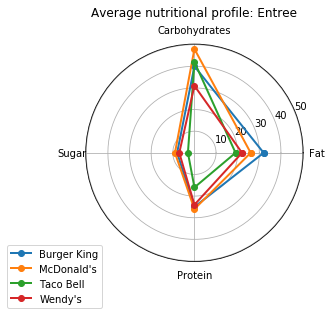

In [5]:
# Create radar charts to compare the nutritional profile of the average item_type at each restaurant
# Entree:
df_entree = df_group_brand.loc['entree']
labels = np.array(['Fat','Carbohydrates','Sugar','Protein'])
restaurant_labels = list(df_entree.index)

# Create polar graph with each macronutrient as an axis
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
plt.title('Average nutritional profile: Entree', y=1.1)
    
# Loop to add each restaurant to the chart
i = 0
for restaurant in df_entree.index:
    entree_radar = df_entree.loc[(df_entree.index[i]),labels]
    entree_radar = np.concatenate((entree_radar,[entree_radar[0]]))
    ax.plot(angles, entree_radar, 'o-', linewidth=2, label=df_entree.index[i])
    plt.legend(bbox_to_anchor=(0.1, 0.1), labels=restaurant_labels)
    i += 1
    
plt.savefig('radar_entree.png', dpi=150, bbox_inches = "tight")

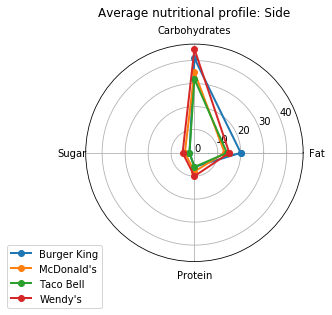

In [6]:
# Create radar charts to compare the nutritional profile of the average item_type at each restaurant
# Side:
df_side = df_group_brand.loc['side']
labels = np.array(['Fat','Carbohydrates','Sugar','Protein'])
restaurant_labels = list(df_side.index)

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
plt.title('Average nutritional profile: Side', y=1.1)

i = 0
for restaurant in df_side.index:
    side_radar = df_side.loc[(df_side.index[i]),labels]
    side_radar = np.concatenate((side_radar,[side_radar[0]]))
    ax.plot(angles, side_radar, 'o-', linewidth=2, label=df_side.index[i])
    plt.legend(bbox_to_anchor=(0.1, 0.1), labels=restaurant_labels)
    i += 1
    
plt.savefig('radar_side.png', dpi=150, bbox_inches = "tight")

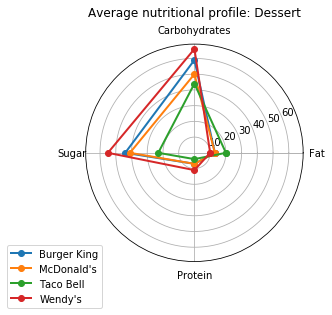

In [7]:
# Create radar charts to compare the nutritional profile of the average item_type at each restaurant
# Dessert:
df_dessert = df_group_brand.loc['dessert']
labels = np.array(['Fat','Carbohydrates','Sugar','Protein'])
restaurant_labels = list(df_dessert.index)

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
plt.title('Average nutritional profile: Dessert', y=1.1)
    
i = 0
for restaurant in df_dessert.index:
    dessert_radar = df_dessert.loc[(df_dessert.index[i]),labels]
    dessert_radar = np.concatenate((dessert_radar,[dessert_radar[0]]))
    ax.plot(angles, dessert_radar, 'o-', linewidth=2, label=df_dessert.index[i])
    plt.legend(bbox_to_anchor=(0.1, 0.1), labels=restaurant_labels)
    i += 1
    
plt.savefig('radar_dessert.png', dpi=150, bbox_inches = "tight")

### What nutritional goals were analyzed?

Four nutritional goal scenarios were analyzed to create meal combinations: 1500 calories per day (df_meal_0), 2000 calories (df_meal_1), 2500 calories (df_meal_2), and 3000 calories (df_meal_3). Carbohydrate, sugar, and fat goals were set as a percentage of calories in df_goal_daily.

In [8]:
df_goal_daily

,calories,carbs,sugar,total_fat
0,1500.0,225.0,19.0,50.0
1,2000.0,300.0,25.0,67.0
2,2500.0,375.0,31.0,83.0
3,3000.0,450.0,38.0,100.0


The nutritional goal for each meal (df_goal_meal) was set to be 40% of the daily goal.

In [9]:
df_goal_meal

,calories,carbs,sugar,total_fat
0,600.0,90.0,7.6,20.0
1,800.0,120.0,10.0,26.8
2,1000.0,150.0,12.4,33.2
3,1200.0,180.0,15.2,40.0


### How many meal combination options were found for each scenario at each restaurant?

In [10]:
# Groupby and count the meal combinations at each restaurant for each scenario
df_group_count_0 = df_meal_0.groupby(['meal_type','brand_name'])['meal_type'].count()
df_group_count_1 = df_meal_1.groupby(['meal_type','brand_name'])['meal_type'].count()
df_group_count_2 = df_meal_2.groupby(['meal_type','brand_name'])['meal_type'].count()
df_group_count_3 = df_meal_3.groupby(['meal_type','brand_name'])['meal_type'].count()

df_meal_count = pd.concat([df_group_count_0, df_group_count_1, df_group_count_2, df_group_count_3], join='outer', axis=1)
df_meal_count = df_meal_count.fillna(0)
df_meal_count

meal_type  meal_type  meal_type  meal_type
meal_type           brand_name                                             
entree_only         Burger King  18.0       29.0       36.0       40       
                    McDonald's   41.0       78.0       121.0      143      
                    Taco Bell    65.0       75.0       91.0       97       
                    Wendy's      22.0       31.0       40.0       42       
entree_side         Burger King  11.0       57.0       193.0      352      
                    McDonald's   130.0      416.0      1025.0     1693     
                    Taco Bell    457.0      904.0      1215.0     1468     
                    Wendy's      70.0       147.0      285.0      395      
entree_side_dessert Burger King  3.0        24.0       100.0      335      
                    McDonald's   117.0      622.0      2325.0     6347     
                    Taco Bell    0.0        0.0        346.0      1411     
                    Wendy's      0.0        0.0        0.0        11

In [11]:
list_entree = []
list_entree.append((list(df_entree.loc['Burger King'].values),list(df_entree.loc["McDonald's"].values),list(df_entree.loc["Taco Bell"].values),list(df_entree.loc["Wendy's"].values)))
list_entree

[([541.0, 32.0, 40.0, 8.0, 25.0],
  [533.0, 26.0, 48.0, 9.0, 26.0],
  [417.0, 19.0, 42.0, 3.0, 16.0],
  [417.0, 22.0, 31.0, 7.0, 24.0])]

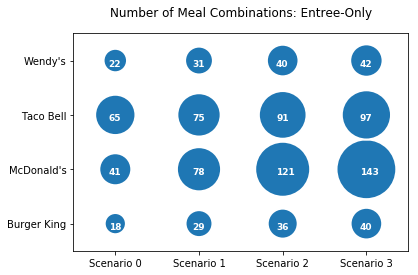

In [23]:
# Plot df_meal_count as a bubble grid chart where the x-axis is Scenario, the y-axis is the restaurant, and the size of the bubble correlates with number of meal options.
# Entree-only:

df_entree = df_meal_count.loc['entree_only']
df_entree.columns = ['Scenario 0', 'Scenario 1', 'Scenario 2', 'Scenario 3']

# Set x and y to create a bubble chart with the desired bubble locations
x = [[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y_base = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
y = y_base
size = df_entree

# Adjust axes limits
sct = plt.scatter(x, y, s=size*25, linewidths=2, edgecolor='w')
ax = plt.gca()
ax.set_ylim(0.5,4.5)
ax.set_xlim(0.5,4.5)
plt.title('Number of Meal Combinations: Entree-Only', y=1.05)

# Relabel the x and y axes
y_axis_base = [1,2,3,4]
y_axis = y_axis_base
y_labels = ["Burger King", "McDonald's", "Taco Bell", "Wendy's"]
plt.yticks(y_axis, y_labels)

x_axis_base = [1,2,3,4]
x_axis = x_axis_base
x_labels = ['Scenario 0', 'Scenario 1', 'Scenario 2', 'Scenario 3']
plt.xticks(x_axis, x_labels)

x_flat = [item for sublist in x for item in sublist]
y_flat_base = [item for sublist in y_base for item in sublist]
y_flat = y_flat_base
list_entree_flat = list(df_entree.loc['Burger King'].values)+list(df_entree.loc["McDonald's"].values)+list(df_entree.loc["Taco Bell"].values)+list(df_entree.loc["Wendy's"].values)

# Annotate each bubble with the number of meal combinations
for i in range(len(list_entree_flat)):
    x = x_flat[i]
    y = y_flat[i]
    plt.text(x-0.08, y-0.1, int(list_entree_flat[i]), fontsize=9, color='white', weight='bold')

plt.savefig('bubble_entree.png', dpi=100, bbox_inches = "tight")

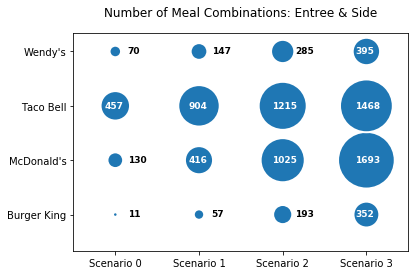

In [24]:
# Plot df_meal_count as a bubble grid chart where the x-axis is Scenario, the y-axis is the restaurant, and the size of the bubble correlates with number of meal options.
# Entree-side:

df_entree_side = df_meal_count.loc['entree_side']
df_entree_side.columns = ['Scenario 0', 'Scenario 1', 'Scenario 2', 'Scenario 3']

x = [[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y_scale = 3
y_base = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
y = [[y_scale*i for i in sublist] for sublist in y_base]
size = df_entree_side

# Adjust axes limits
sct = plt.scatter(x, y, s=size*1.9, linewidths=2, edgecolor='w')
ax = plt.gca()
ax.set_ylim(1,13)
ax.set_xlim(0.5,4.5)
plt.title('Number of Meal Combinations: Entree & Side', y=1.05)

# Relabel the x and y axes
y_axis_base = [1,2,3,4]
y_axis = [y_scale * i for i in y_axis_base]
plt.yticks(y_axis, y_labels)
plt.xticks(x_axis, x_labels)

y_flat_base = [item for sublist in y_base for item in sublist]
y_flat = [y_scale * i for i in y_flat_base]
list_entree_side_flat = list(df_entree_side.loc['Burger King'].values)+list(df_entree_side.loc["McDonald's"].values)+list(df_entree_side.loc["Taco Bell"].values)+list(df_entree_side.loc["Wendy's"].values)

# Annotate each bubble with the number of meal combinations
# Separate out annotations by size of bubble: large bubbles get center annontations in white, small bubbles get side annotations in black
# Identify index of large bubbles in list_entree_side_flat
note_threshold = 300
index_large = [list_entree_side_flat.index(i) for i in list_entree_side_flat if i > note_threshold]
index_small = [list_entree_side_flat.index(i) for i in list_entree_side_flat if i <= note_threshold]

for i in index_large:
    x = x_flat[i]
    y = y_flat[i]
    plt.text(x-0.13, y-0.12, int(list_entree_side_flat[i]), fontsize=9, color='white', weight='bold')
    
for i in index_small:
    x = x_flat[i]
    y = y_flat[i]
    plt.text(x+0.15, y-0.12, int(list_entree_side_flat[i]), fontsize=9, color='black', weight='bold')
    
plt.savefig('bubble_entree_side.png', dpi=100, bbox_inches = "tight")

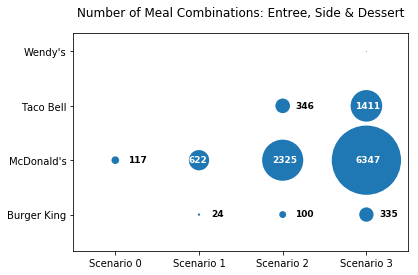

In [25]:
# Plot df_meal_count as a bubble grid chart where the x-axis is Scenario, the y-axis is the restaurant, and the size of the bubble correlates with number of meal options.
# Entree-side-dessert:

df_entree_side_dessert = df_meal_count.loc['entree_side_dessert']
df_entree_side_dessert.columns = ['Scenario 0', 'Scenario 1', 'Scenario 2', 'Scenario 3']

x = [[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y_scale = 3
y_base = [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
y = [[y_scale*i for i in sublist] for sublist in y_base]
size = df_entree_side_dessert

# Adjust axes limits
sct = plt.scatter(x, y, s=size*0.8, linewidths=2, edgecolor='w')
ax = plt.gca()
ax.set_ylim(1,13)
ax.set_xlim(0.5,4.5)
plt.title('Number of Meal Combinations: Entree, Side & Dessert', y=1.05)

# Relabel the x and y axes
y_axis_base = [1,2,3,4]
y_axis = [y_scale * i for i in y_axis_base]
plt.yticks(y_axis, y_labels)
plt.xticks(x_axis, x_labels)

y_flat_base = [item for sublist in y_base for item in sublist]
y_flat = [y_scale * i for i in y_flat_base]
list_entree_side_dessert_flat = list(df_entree_side_dessert.loc['Burger King'].values)+list(df_entree_side_dessert.loc["McDonald's"].values)+list(df_entree_side_dessert.loc["Taco Bell"].values)+list(df_entree_side_dessert.loc["Wendy's"].values)

# Annotate each bubble with the number of meal combinations
# Separate out annotations by size of bubble: large bubbles get center annontations in white, small bubbles get side annotations in black
# Identify index of large bubbles in list_entree_side_dessert_flat
note_threshold = 400
index_large = [list_entree_side_dessert_flat.index(i) for i in list_entree_side_dessert_flat if i > note_threshold]
index_small = [list_entree_side_dessert_flat.index(i) for i in list_entree_side_dessert_flat if 20 < i <= note_threshold]

for i in index_large:
    x = x_flat[i]
    y = y_flat[i]
    plt.text(x-0.13, y-0.12, int(list_entree_side_dessert_flat[i]), fontsize=9, color='white', weight='bold')
    
for i in index_small:
    x = x_flat[i]
    y = y_flat[i]
    plt.text(x+0.15, y-0.12, int(list_entree_side_dessert_flat[i]), fontsize=9, color='black', weight='bold')
    
plt.savefig('bubble_entree_side_dessert.png', dpi=100, bbox_inches = "tight")

In [33]:
# At Scenario_2 (2500 cal/day), what is the average nutritional profile for each meal combination at each restaurant?
df_group_mean = df_meal_2.groupby(['meal_type', 'brand_name'])[['calories','total_fat','carbs','sugar','protein']].mean().round()
df_group_mean

calories  total_fat  carbs  sugar  protein
meal_type           brand_name                                             
entree_only         Burger King  338.0     16.0       31.0   6.0    17.0   
                    McDonald's   441.0     21.0       40.0   6.0    23.0   
                    Taco Bell    358.0     16.0       36.0   3.0    14.0   
                    Wendy's      345.0     18.0       26.0   4.0    21.0   
entree_side         Burger King  559.0     26.0       60.0   7.0    21.0   
                    McDonald's   569.0     24.0       62.0   7.0    26.0   
                    Taco Bell    490.0     22.0       54.0   3.0    16.0   
                    Wendy's      534.0     21.0       61.0   7.0    25.0   
entree_side_dessert Burger King  560.0     26.0       60.0   9.0    22.0   
                    McDonald's   590.0     26.0       63.0   8.0    26.0   
                    Taco Bell    534.0     25.0       54.0   12.0   13.0

In [34]:
df_meal_count.to_csv('meal_combo_count.csv')